**Labour Wages**

**Part: 3**

In [187]:
import pandas as pd
df = pd.read_csv("C:/Users/Rush/.spyder-py3/flairminds/dataset/Minimum_Wage_Data.csv", encoding="latin")

In [188]:
df.to_csv("minwages.csv", encoding="utf-8")
df = pd.read_csv("minwages.csv")
#df = df.set_index('Year')
df.head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [189]:
gb = df.groupby("State")
gb.get_group("Alaska").set_index("Year").head(10)
df.columns.unique()

Index(['Unnamed: 0', 'Year', 'State', 'State.Minimum.Wage',
       'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage',
       'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage',
       'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average',
       'Department.Of.Labor.Uncleaned.Data',
       'Department.Of.Labor.Cleaned.Low.Value',
       'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
       'Department.Of.Labor.Cleaned.High.Value',
       'Department.Of.Labor.Cleaned.High.Value.2020.Dollars', 'Footnote'],
      dtype='object')

In [190]:
curr_minWage= pd.DataFrame()

for name, group in df.groupby("State"):
    if curr_minWage.empty:
        curr_minWage = group.set_index("Year")[["Effective.Minimum.Wage.2020.Dollars"]].rename(columns={"Effective.Minimum.Wage.2020.Dollars":name})
    else:
        curr_minWage = curr_minWage.join(group.set_index("Year")[["Effective.Minimum.Wage.2020.Dollars"]].rename(columns={"Effective.Minimum.Wage.2020.Dollars":name}))
        
curr_minWage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,8.55,15.61,8.55,8.55,12.26,8.55,10.41,9.29,9.29,8.55,...,8.55,8.55,8.55,8.55,10.41,8.55,11.89,8.55,9.29,8.92
1969,8.11,14.80,8.11,8.11,11.63,8.11,9.87,8.81,8.81,8.11,...,8.11,8.11,8.11,8.11,9.87,8.11,11.28,8.11,8.81,8.46
1970,8.67,14.00,8.67,8.67,11.00,8.67,10.67,8.67,10.67,8.67,...,8.67,8.67,8.67,8.67,10.67,8.67,10.67,8.67,8.67,8.67
1971,8.30,13.41,8.30,8.30,10.54,8.30,10.22,8.30,10.22,8.30,...,8.30,8.30,8.30,8.30,10.22,8.30,10.22,8.30,8.30,8.30
1972,9.90,12.99,9.90,9.90,10.21,9.90,11.45,9.90,9.90,9.90,...,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90


In [191]:
issue_minWage_df = df[df["Effective.Minimum.Wage.2020.Dollars"]==0]
issue_minWage_df.head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote


In [192]:
cero_minWage_df = df[df["State.Minimum.Wage.2020.Dollars"]==0]
cero_minWage_df = cero_minWage_df.set_index("Year")
cero_minWage_df.head()

,Unnamed: 0,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
Year,,,,,,,,,,,,,,,
1968,0,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1968,9,Florida,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1968,10,Georgia,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1968,14,Illinois,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1968,16,Iowa,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN


In [193]:
df.describe()
curr_minWage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,7.991887,9.917736,8.435849,8.186604,9.161321,8.432453,9.212830,8.454717,9.295472,8.247358,...,7.991887,7.991887,8.211132,7.991887,9.057358,7.991887,9.402075,8.201887,8.078868,8.005472
std,0.903959,1.852213,1.227011,0.918102,1.415633,1.199128,1.106907,0.781246,1.632104,0.840023,...,0.903959,0.903959,0.988137,0.903959,1.093119,0.903959,1.524325,0.908211,0.869634,0.911853
min,6.420000,7.620000,6.610000,6.610000,6.630000,6.610000,7.040000,6.630000,6.930000,6.630000,...,6.420000,6.420000,6.420000,6.420000,7.030000,6.420000,6.630000,6.610000,6.630000,6.420000
25%,7.340000,8.590000,7.610000,7.520000,8.050000,7.610000,8.200000,8.000000,8.390000,7.630000,...,7.340000,7.340000,7.650000,7.340000,8.060000,7.340000,8.070000,7.520000,7.420000,7.340000
50%,7.900000,9.260000,8.340000,8.050000,9.130000,8.390000,9.430000,8.470000,8.980000,8.320000,...,7.900000,7.900000,8.050000,7.900000,9.240000,7.900000,9.730000,8.110000,7.910000,7.900000
75%,8.390000,10.510000,8.740000,8.700000,9.820000,8.960000,9.870000,8.890000,9.760000,8.670000,...,8.390000,8.390000,8.670000,8.390000,9.820000,8.390000,10.180000,8.740000,8.600000,8.460000
max,10.330000,15.610000,12.140000,10.330000,13.000000,12.140000,11.450000,10.330000,14.160000,10.330000,...,10.330000,10.330000,10.620000,10.330000,11.090000,10.330000,13.660000,10.330000,10.330000,10.330000


In [194]:
# correlation:(correlation coeficient)r = ∑(xi-x_mean)*(yi-y_mean)/√‾(∑(xi-x_mean)² * ∑(yi-y_mean)²)
# range: -1 to +1
# ref:
curr_minWage.corr()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,1.000000,0.620364,0.494796,0.815863,0.281291,0.506270,0.380878,0.714823,0.183245,0.843128,...,1.000000,1.000000,0.747871,1.000000,0.372679,1.000000,0.139595,0.853105,0.944593,0.997126
Alaska,0.620364,1.000000,0.441018,0.619306,0.668420,0.444483,0.646909,0.646148,0.332957,0.589012,...,0.620364,0.620364,0.501587,0.620364,0.615675,0.620364,0.479309,0.612712,0.697198,0.658431
Arizona,0.494796,0.441018,1.000000,0.885807,0.732276,0.994981,0.688033,0.717137,0.820889,0.755036,...,0.494796,0.494796,0.742403,0.494796,0.752045,0.494796,0.715554,0.816156,0.486170,0.489279
Arkansas,0.815863,0.619306,0.885807,1.000000,0.619974,0.892103,0.636162,0.831495,0.617050,0.904296,...,0.815863,0.815863,0.863931,0.815863,0.662473,0.815863,0.517583,0.954115,0.798220,0.811273
California,0.281291,0.668420,0.732276,0.619974,1.000000,0.738742,0.895479,0.736683,0.796175,0.547788,...,0.281291,0.281291,0.456079,0.281291,0.926371,0.281291,0.946904,0.577843,0.360438,0.308809
Colorado,0.506270,0.444483,0.994981,0.892103,0.738742,1.000000,0.691278,0.734622,0.817785,0.772044,...,0.506270,0.506270,0.760278,0.506270,0.755209,0.506270,0.713452,0.822146,0.503797,0.500668
Connecticut,0.380878,0.646909,0.688033,0.636162,0.895479,0.691278,1.000000,0.784200,0.730646,0.630741,...,0.380878,0.380878,0.421519,0.380878,0.911003,0.380878,0.861724,0.624063,0.437366,0.390403
Delaware,0.714823,0.646148,0.717137,0.831495,0.736683,0.734622,0.784200,1.000000,0.592975,0.830542,...,0.714823,0.714823,0.664615,0.714823,0.788865,0.714823,0.668708,0.828064,0.751969,0.720335
District of Columbia,0.183245,0.332957,0.820889,0.617050,0.796175,0.817785,0.730646,0.592975,1.000000,0.508739,...,0.183245,0.183245,0.435784,0.183245,0.837941,0.183245,0.830568,0.584376,0.160520,0.179437
Florida,0.843128,0.589012,0.755036,0.904296,0.547788,0.772044,0.630741,0.830542,0.508739,1.000000,...,0.843128,0.843128,0.721826,0.843128,0.671072,0.843128,0.466186,0.926586,0.880520,0.837433


In [195]:
# covariance: =(1/(n-1))*∑(xi-x_mean)(yi-y_mean) ...for i=1 to n
# range: -∞ to +∞
# Covariance matrix: Guasian mixture model, PCA, 
# ref: https://careerfoundry.com/en/blog/data-analytics/covariance-vs-correlation/#:~:text=What%20is%20a%20covariance%20matrix
curr_minWage.cov()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,0.817143,1.038691,0.548812,0.677107,0.359961,0.548778,0.381106,0.504818,0.270351,0.640226,...,0.817143,0.817143,0.668025,0.817143,0.368257,0.817143,0.192352,0.700387,0.742558,0.821909
Alaska,1.038691,3.430695,1.002296,1.053142,1.752632,0.987215,1.326310,0.934997,1.006532,0.916446,...,1.038691,1.038691,0.918024,1.038691,1.246550,1.038691,1.353270,1.030704,1.123011,1.112055
Arizona,0.548812,1.002296,1.505556,0.997880,1.271961,1.463958,0.934477,0.687445,1.643919,0.778229,...,0.548812,0.548812,0.900130,0.548812,1.008695,0.548812,1.338345,0.909512,0.518768,0.547431
Arkansas,0.677107,1.053142,0.997880,0.842911,0.805778,0.982135,0.646502,0.596401,0.924611,0.697418,...,0.677107,0.677107,0.783767,0.677107,0.664854,0.677107,0.724349,0.795570,0.637310,0.679177
California,0.359961,1.752632,1.271961,0.805778,2.004016,1.254033,1.403192,0.814740,1.839529,0.651409,...,0.359961,0.359961,0.637981,0.359961,1.433517,0.359961,2.043309,0.742928,0.443728,0.398625
Colorado,0.548778,0.987215,1.463958,0.982135,1.254033,1.437907,0.917549,0.688204,1.600488,0.777676,...,0.548778,0.548778,0.900855,0.548778,0.989920,0.548778,1.304091,0.895366,0.525361,0.547444
Connecticut,0.381106,1.326310,0.934477,0.646502,1.403192,0.917549,1.225244,0.678150,1.319977,0.586481,...,0.381106,0.381106,0.461047,0.381106,1.102296,0.381106,1.453975,0.627373,0.421011,0.394048
Delaware,0.504818,0.934997,0.687445,0.596401,0.814740,0.688204,0.678150,0.610345,0.756087,0.545055,...,0.504818,0.504818,0.513068,0.504818,0.673686,0.504818,0.796346,0.587541,0.510886,0.513153
District of Columbia,0.270351,1.006532,1.643919,0.924611,1.839529,1.600488,1.319977,0.756087,2.663764,0.697484,...,0.270351,0.270351,0.702807,0.270351,1.494957,0.270351,2.066335,0.866216,0.227831,0.267044
Florida,0.640226,0.916446,0.778229,0.697418,0.651409,0.777676,0.586481,0.545055,0.697484,0.705639,...,0.640226,0.640226,0.599157,0.640226,0.616208,0.640226,0.596936,0.706909,0.643232,0.641455


In [196]:
cero_minWage_df["State"].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'U.S. Virgin Islands',
       'Virginia', 'Arizona', 'Puerto Rico'], dtype=object)

In [197]:
import numpy as np

minWage_corr = curr_minWage.replace(0, np.NaN).dropna(axis=1).corr()
for prb in cero_minWage_df["State"].unique():
    if prb in minWage_corr.columns:
        print("Missing some data here...")

Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...
Missing some data here...


In [198]:
grouped_cero = cero_minWage_df.groupby("State")
print(grouped_cero)
grouped_cero.get_group("Alabama").head(3)

,Unnamed: 0,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
Year,,,,,,,,,,,,,,,
1968,0,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1969,54,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
1970,108,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN


In [199]:
grouped_cero.get_group("Alabama")["State.Minimum.Wage.2020.Dollars"].sum()

0.0

In [200]:
for state, data in grouped_cero:
    if data["State.Minimum.Wage.2020.Dollars"].sum()!=0.0:
        print("We missed somthiong... in state", state)

--------------------------------------------------------------------------------------------------------------------------------



**Part: 4**

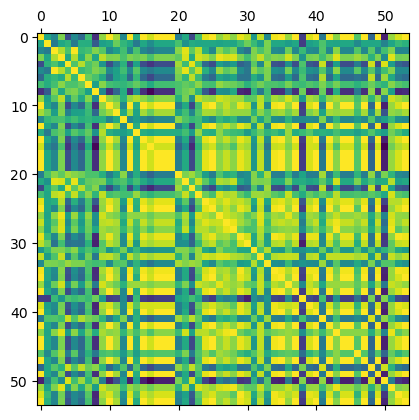

In [201]:
# we have "minWage_corr"
import matplotlib.pyplot as plt

plt.matshow(minWage_corr)
plt.show()

In [202]:
print(len(minWage_corr.columns))
minWage_corr.columns

54


Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'U.S. Virgin Islands', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

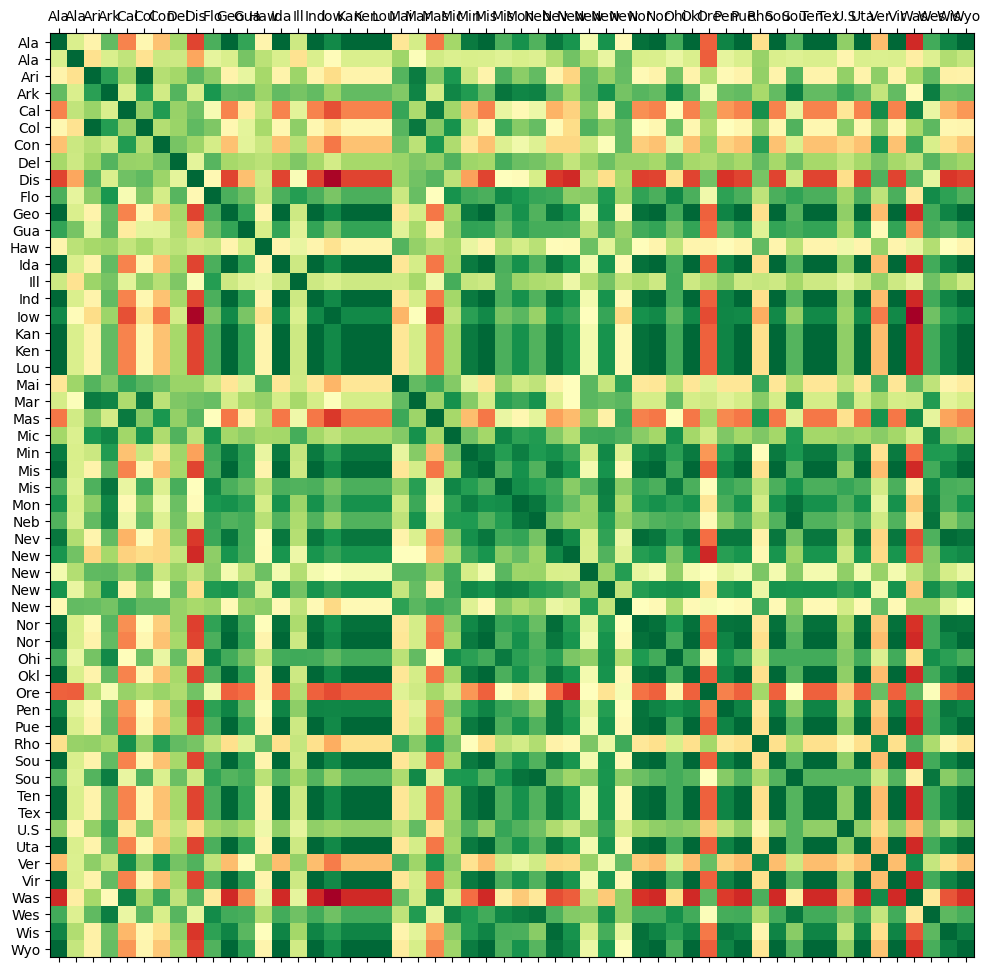

In [203]:
labels = [c[:3] for c in minWage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(minWage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

install 

In [204]:
# installing lxml, html5lib, bs4
dfst = pd.read_html("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")

In [205]:
for df in dfst:
    print(df.head())

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [206]:
state_abr = dfst[0]
state_abr.to_csv("state_abbrivations.csv", index=False)
state_abr.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [207]:
st_abv =  pd.read_csv("state_abbrivations.csv", index_col = 0)
st_abv.head()

,Postal Abbreviation,Postal Code
State Name/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [211]:
abbv_dict = st_abv[["Postal Code"]].to_dict()
abbv_dict = abbv_dict["Postal Code"]
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [214]:
nlabels = [abbv_dict[c] for c in minWage_corr.columns]

In [216]:
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
abbv_dict['U.S. Virgin Islands'] = "VI"

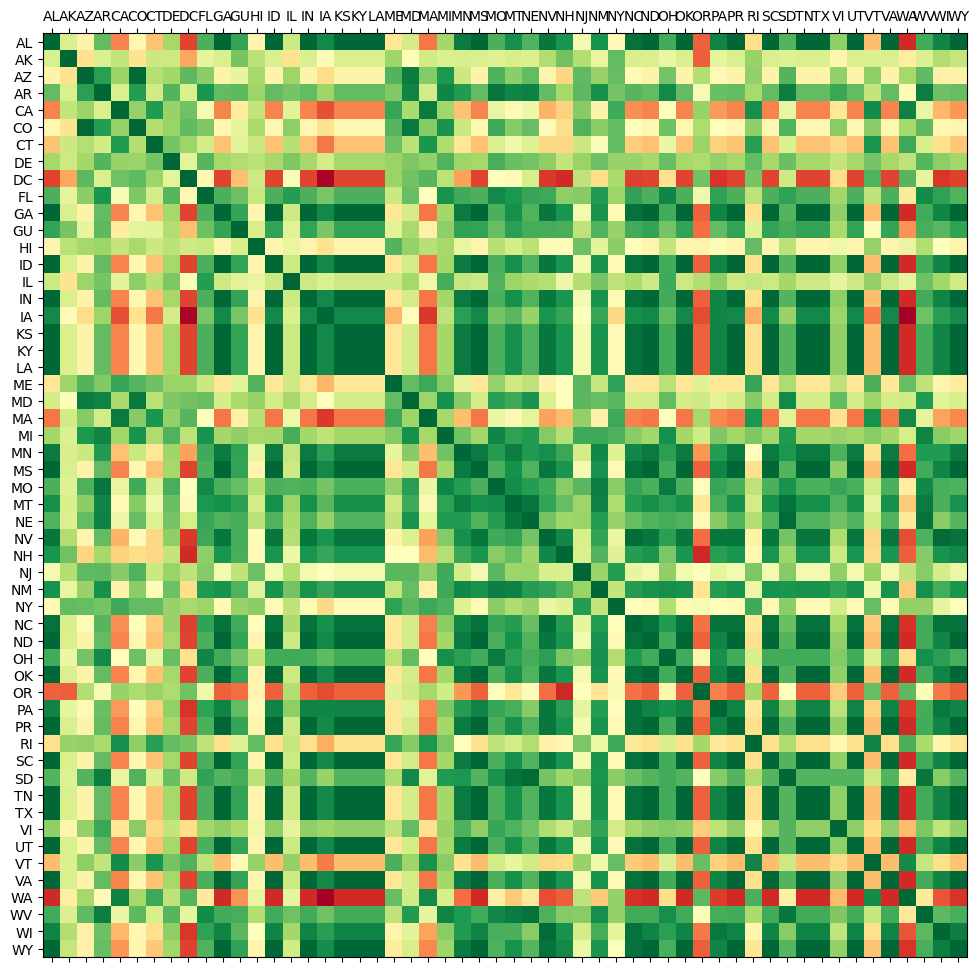

In [217]:
# new plotting:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(minWage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(nlabels)))
ax.set_yticks(np.arange(len(nlabels)))

ax.set_xticklabels(nlabels)
ax.set_yticklabels(nlabels)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

**Part: 5**

In [218]:
unemp_county = pd.read_csv("C:/Users/Rush/.spyder-py3/flairminds/dataset/unemp_rate.csv")
unemp_county.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [219]:
curr_minWage = curr_minWage.replace(0, np.NaN).dropna(axis=1)
curr_minWage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,8.55,15.61,8.55,8.55,12.26,8.55,10.41,9.29,9.29,8.55,...,8.55,8.55,8.55,8.55,10.41,8.55,11.89,8.55,9.29,8.92
1969,8.11,14.80,8.11,8.11,11.63,8.11,9.87,8.81,8.81,8.11,...,8.11,8.11,8.11,8.11,9.87,8.11,11.28,8.11,8.81,8.46
1970,8.67,14.00,8.67,8.67,11.00,8.67,10.67,8.67,10.67,8.67,...,8.67,8.67,8.67,8.67,10.67,8.67,10.67,8.67,8.67,8.67
1971,8.30,13.41,8.30,8.30,10.54,8.30,10.22,8.30,10.22,8.30,...,8.30,8.30,8.30,8.30,10.22,8.30,10.22,8.30,8.30,8.30
1972,9.90,12.99,9.90,9.90,10.21,9.90,11.45,9.90,9.90,9.90,...,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90


In [220]:
def get_min_wage(year, state):
    try:
        return curr_minWage.loc[year][state]
    except:
        return np.NaN
get_min_wage(2012,"Colorado")

8.61

In [221]:
%%time

unemp_county['min_wage'] = list(map(get_min_wage, unemp_county['Year'], unemp_county["State"]))

CPU times: total: 52.2 s
Wall time: 52.2 s


In [222]:
unemp_county.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,7.91
1,2015,February,Mississippi,Panola County,9.4,7.91
2,2015,February,Mississippi,Monroe County,7.9,7.91
3,2015,February,Mississippi,Hinds County,6.1,7.91
4,2015,February,Mississippi,Kemper County,10.6,7.91


In [223]:
unemp_county[["Rate","min_wage"]].corr()

,Rate,min_wage
Rate,1.000000,0.183994
min_wage,0.183994,1.000000


In [224]:
unemp_county[["Rate","min_wage"]].cov()

,Rate,min_wage
Rate,9.687873,0.417907
min_wage,0.417907,0.532506


In [225]:
pres_el16 = pd.read_csv("C:/Users/Rush/.spyder-py3/flairminds/dataset/pres_election_votes.csv")
print(pres_el16['st'].unique())
pres_el16.head()

['US' 'CA' 'FL' 'TX' 'NY' 'PA' 'IL' 'OH' 'MI' 'NC' 'GA' 'VA' 'NJ' 'MA'
 'WI' 'MN' 'MO' 'WA' 'IN' 'CO' 'TN' 'MD' 'SC' 'AL' 'AZ' 'LA' 'KY' 'OR'
 'CT' 'IA' 'OK' 'MS' 'KS' 'NV' 'AR' 'UT' 'NE' 'NM' 'ME' 'NH' 'WV' 'ID'
 'MT' 'RI' 'DE' 'HI' 'SD' 'ND' 'VT' 'DC' 'WY' 'AK' nan]


,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [226]:
county_2015 = unemp_county.copy()[(unemp_county['Year']==2015) & (unemp_county['Month']=='February')]
county_2015.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,7.91
1,2015,February,Mississippi,Panola County,9.4,7.91
2,2015,February,Mississippi,Monroe County,7.9,7.91
3,2015,February,Mississippi,Hinds County,6.1,7.91
4,2015,February,Mississippi,Kemper County,10.6,7.91


In [227]:
#abbv_dict

In [228]:
county_2015['State'] = county_2015['State'].map(abbv_dict)

In [229]:
print(len(county_2015))
print(len(pres_el16))
county_2015.head()

2802
18475


,Year,Month,State,County,Rate,min_wage
0,2015,February,MS,Newton County,6.1,7.91
1,2015,February,MS,Panola County,9.4,7.91
2,2015,February,MS,Monroe County,7.9,7.91
3,2015,February,MS,Hinds County,6.1,7.91
4,2015,February,MS,Kemper County,10.6,7.91


In [230]:
pres_el16.rename(columns={"county":"County","st":"State"}, inplace=True)
pres_el16.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [231]:
for df in [county_2015, pres_el16]:
    df.set_index(["County", "State"], inplace=True)

In [232]:
pres_el16 = pres_el16[pres_el16["cand"]=="Donald Trump"]
pres_el16 = pres_el16[["pct"]]
pres_el16.dropna(inplace=True)
pres_el16.head()

pct
County State          
NaN    US     0.472993
       CA     0.330641
       FL     0.490640
       TX     0.525830
       NY     0.374752

In [238]:
all_for_one = county_2015.merge(pres_el16, on=["County", "State"])
all_for_one.dropna(inplace=True)
all_for_one.head()

,,Year,Month,Rate,min_wage,pct
County,State,,,,,
Newton County,MS,2015,February,6.1,7.91,0.689900
Panola County,MS,2015,February,9.4,7.91,0.496230
Monroe County,MS,2015,February,7.9,7.91,0.640454
Hinds County,MS,2015,February,6.1,7.91,0.272232
Kemper County,MS,2015,February,10.6,7.91,0.383272


In [239]:
all_for_one.drop('Year', axis=1, inplace=True)
all_for_one.head()

,,Month,Rate,min_wage,pct
County,State,,,,
Newton County,MS,February,6.1,7.91,0.689900
Panola County,MS,February,9.4,7.91,0.496230
Monroe County,MS,February,7.9,7.91,0.640454
Hinds County,MS,February,6.1,7.91,0.272232
Kemper County,MS,February,10.6,7.91,0.383272


In [240]:
all_for_one.corr()

,Rate,min_wage,pct
Rate,1.000000,0.137224,-0.195986
min_wage,0.137224,1.000000,-0.262162
pct,-0.195986,-0.262162,1.000000


In [241]:
all_for_one.cov()

,Rate,min_wage,pct
Rate,5.362972,0.201344,-0.070181
min_wage,0.201344,0.401432,-0.025684
pct,-0.070181,-0.025684,0.023910


--------------------------------------------------------------------------------------------------------------------------------

Observation:                                                                                                                     
**Correlation** between min wag and percentage votes are likely a negatively correlation But **Variance** between those 3 are very very less.

**EOF**